📁 Chart saved to outputs/charts/gender_distribution.png


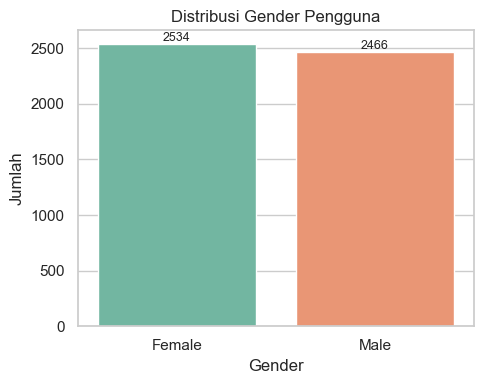

📁 Chart saved to outputs/charts/age_distribution.png


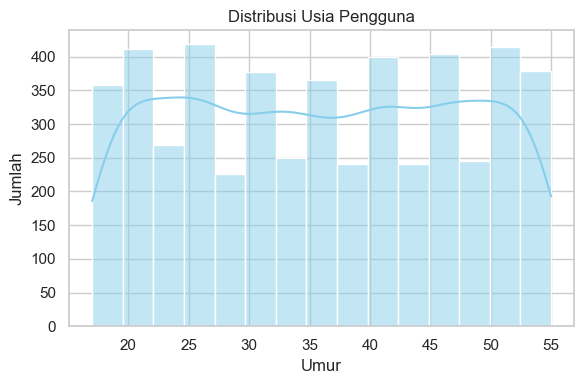

📁 Chart saved to outputs/charts/top10cities.png


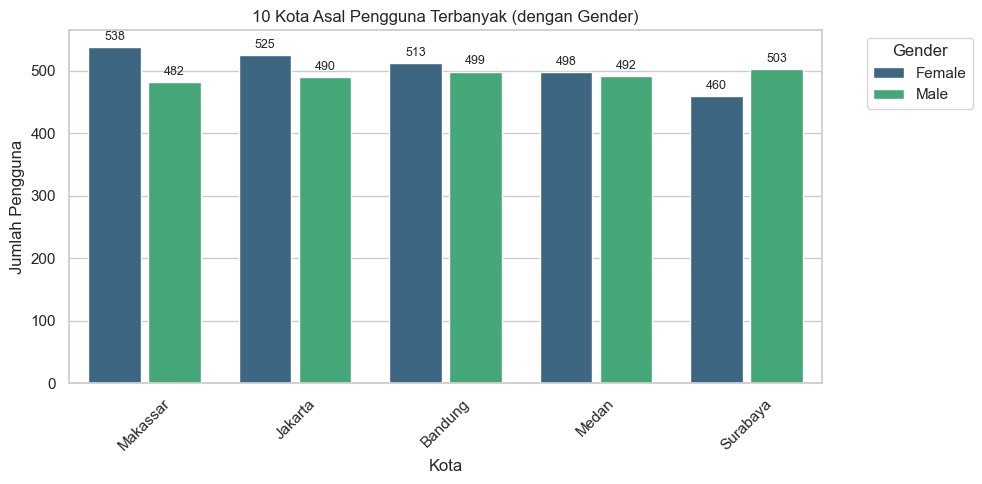

In [6]:
# 📌 Cell 1: Judul & Import


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils.plot_helper import save_plot

df_users = pd.read_csv("../data/raw/users.csv")
df_users.head()

# --- End of code cell 1

plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df_users, x='gender',hue='gender', palette='Set2')

# Tambahkan label jumlah
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.title('Distribusi Gender Pengguna')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.tight_layout()

# Simpan output
save_plot(plt.gcf(), "gender_distribution.png")

plt.show()


# --- End of code cell 2

plt.figure(figsize=(6, 4))
sns.histplot(df_users['age'], bins=15, kde=True, color='skyblue')
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.tight_layout()

# Simpan output
save_plot(plt.gcf(), "age_distribution.png")

plt.show()

# --- End of code cell 3

# Ambil top 10 kota
top10 = df_users['city'].value_counts().nlargest(10).index
df_top = df_users[df_users['city'].isin(top10)]

plt.figure(figsize=(10, 5))
ax = sns.countplot(
    data=df_top,
    x='city',
    hue='gender',
    order=top10,
    palette='viridis'
)

# Resize dan rapatkan bar (tanpa bikin mereka renggang)
target_width = 0.35  # Lebar bar yang lebih kecil
for bar in ax.patches:
    current_width = bar.get_width()
    diff = current_width - target_width
    bar.set_width(target_width)
    bar.set_x(bar.get_x() + diff / 2)  # geser biar tetap nempel

# Tambahkan angka di atas bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center', va='bottom',
            fontsize=9
        )

plt.title('10 Kota Asal Pengguna Terbanyak (dengan Gender)')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Simpan
save_plot(plt.gcf(), "top10cities.png")
plt.show()


# --- End of code cell 4



## 📝 Ringkasan Insight

- **Gender**: Distribusi gender pengguna cukup merata (atau condong ke satu sisi).
- **Usia**: Mayoritas pengguna berada pada rentang usia produktif (18–35 tahun).
- **Kota**: Kota seperti Jakarta, Surabaya, dan Bandung menjadi penyumbang pengguna terbanyak.

Selanjutnya, kita akan eksplorasi data **orders** dan **products**.

C:\Users\iksan\AppData\Local\Temp\ipykernel_27196\17134578.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_orders, x='status', palette='Set1')


📁 Chart saved to outputs/charts/order_status_distribution.png


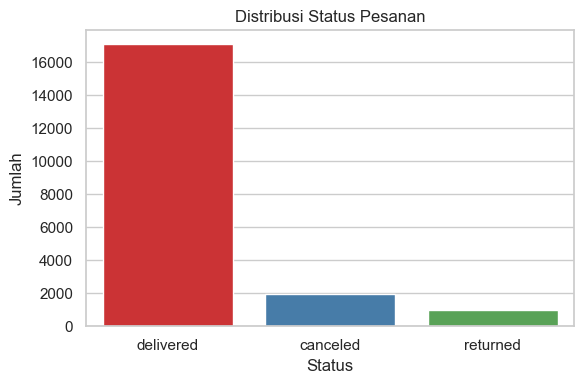

📁 Chart saved to outputs/charts/monthly_orders.png


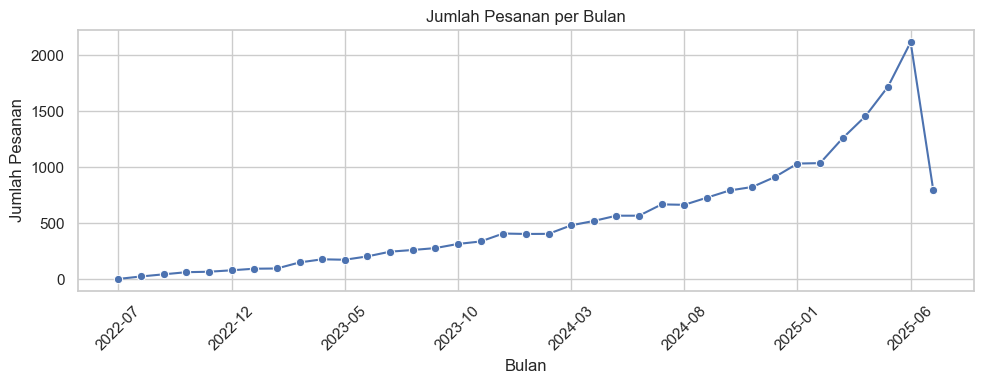

📁 Chart saved to outputs/charts/delivery_days_distribution.png


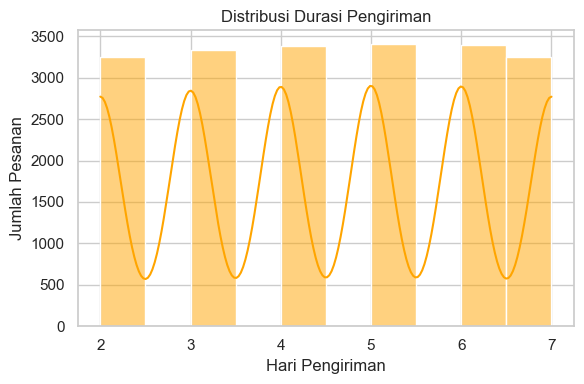

In [7]:
# 📌 Cell 1: Judul & Import


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils.plot_helper import save_plot

df_orders = pd.read_csv("../data/raw/orders.csv", parse_dates=["order_date", "estimated_delivery"])
df_orders.head()

# --- End of code cell 1

plt.figure(figsize=(6, 4))
sns.countplot(data=df_orders, x='status', palette='Set1')
plt.title("Distribusi Status Pesanan")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.tight_layout()

save_plot(plt.gcf(), "order_status_distribution.png")
plt.show()

# --- End of code cell 2

df_orders['month'] = df_orders['order_date'].dt.to_period("M").astype(str)
monthly_orders = df_orders.groupby('month').size().reset_index(name='order_count')

plt.figure(figsize=(10, 4))
sns.lineplot(data=monthly_orders, x='month', y='order_count', marker='o')

# Ambil setiap 5 bulan untuk xticks
months = monthly_orders['month']
plt.xticks(ticks=range(0, len(months), 5), labels=months[::5], rotation=45)
plt.title("Jumlah Pesanan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.tight_layout()

save_plot(plt.gcf(), "monthly_orders.png")
plt.show()

# --- End of code cell 3

df_orders['delivery_days'] = (df_orders['estimated_delivery'] - df_orders['order_date']).dt.days

plt.figure(figsize=(6, 4))
sns.histplot(df_orders['delivery_days'], bins=10, kde=True, color='orange')
plt.title("Distribusi Durasi Pengiriman")
plt.xlabel("Hari Pengiriman")
plt.ylabel("Jumlah Pesanan")
plt.tight_layout()

save_plot(plt.gcf(), "delivery_days_distribution.png")
plt.show()

# --- End of code cell 4



## 📝 Insight Ringkas Orders

- Mayoritas pesanan berhasil dikirim (`delivered`).
- Tren pesanan per bulan menunjukkan pertumbuhan stabil.
- Rata-rata waktu pengiriman sekitar 3–5 hari.

Selanjutnya kita bisa analisis produk yang paling banyak dipesan dan metode pembayaran.

📁 Chart saved to outputs/charts/payment_method_distribution.png


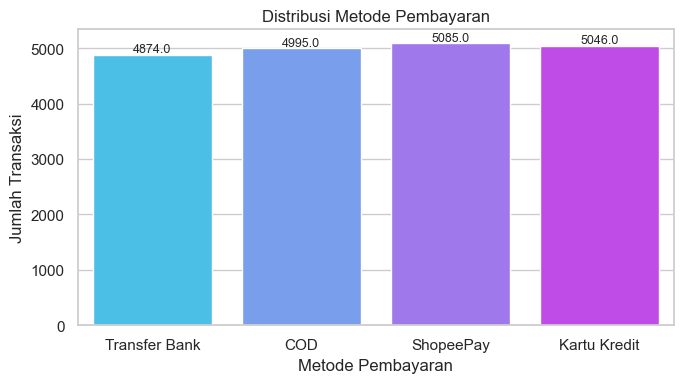

📁 Chart saved to outputs/charts/payment_status_distribution.png


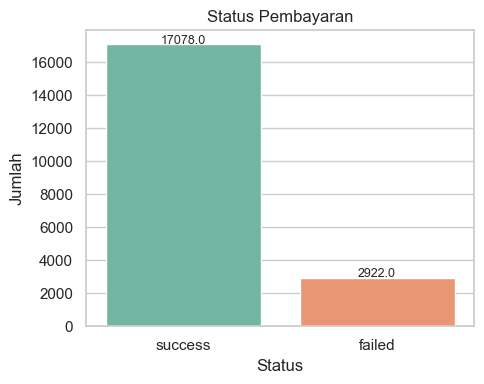

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils.plot_helper import save_plot

df_payments = pd.read_csv("../data/raw/payments.csv")
df_payments.head()

# --- End of code cell 1

plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df_payments, x='payment_method',hue='payment_method', palette='cool')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 50),
                ha='center', fontsize=9)

plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.tight_layout()

save_plot(plt.gcf(), "payment_method_distribution.png")
plt.show()

# --- End of code cell 2

plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df_payments, x='payment_status',hue='payment_status', palette='Set2')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 50),
                ha='center', fontsize=9)

plt.title("Status Pembayaran")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.tight_layout()

save_plot(plt.gcf(), "payment_status_distribution.png")
plt.show()

# --- End of code cell 3



## 📝 Insight Pembayaran

- ShopeePay dan COD mendominasi sebagai metode pembayaran.
- Sebagian besar transaksi memiliki status "success".
- Gagal bayar biasanya berasal dari pesanan yang dibatalkan atau dikembalikan.

EDA selanjutnya: `eda_orders.ipynb` untuk status dan tren pesanan.

📁 Chart saved to outputs/charts/category_distribution.png


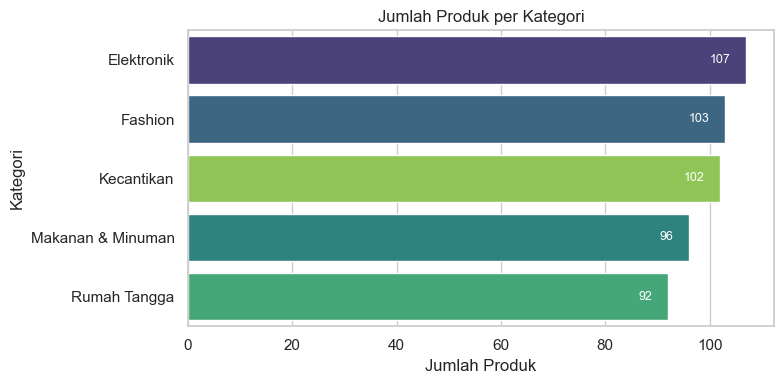

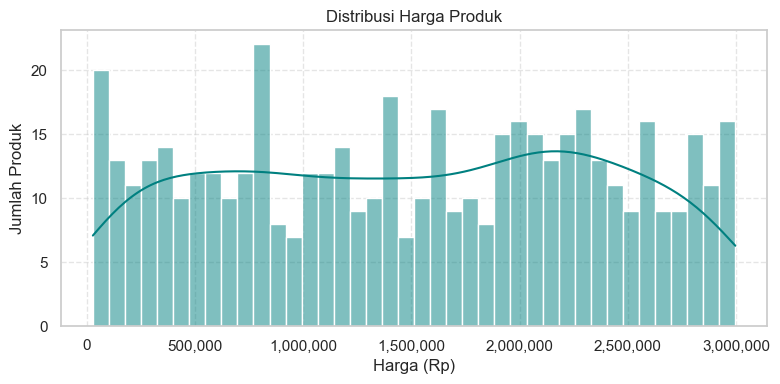

📁 Chart saved to outputs/charts/product_rating_distribution.png


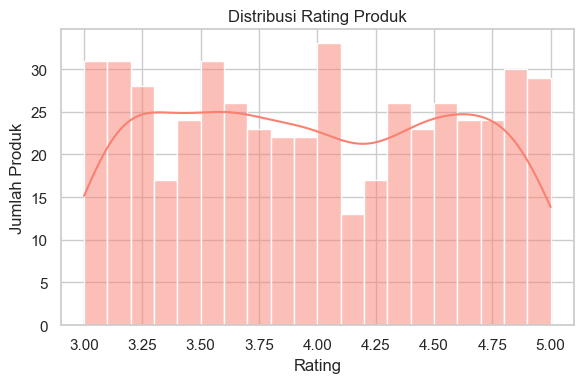

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils.plot_helper import save_plot

df_products = pd.read_csv("../data/raw/products.csv")
df_products.head()

# --- End of code cell 1

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df_products, y='category', hue='category', palette='viridis', 
                   order=df_products['category'].value_counts().index)

# Tambahkan label di dalam batang
for p in ax.patches:
    value = int(p.get_width())
    ax.annotate(f'{value}', 
                (p.get_width() - 3, p.get_y() + p.get_height() / 2), 
                va='center', ha='right', color='white', fontsize=9)

plt.title("Jumlah Produk per Kategori")
plt.xlabel("Jumlah Produk")
plt.ylabel("Kategori")
plt.tight_layout()
save_plot(plt.gcf(), "category_distribution.png")
plt.show()


# --- End of code cell 2

from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(8, 4))
sns.histplot(df_products['price'], bins=40, kde=True, color='teal')

# Ubah format angka di sumbu x menjadi biasa (bukan notasi ilmiah)
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title("Distribusi Harga Produk")
plt.xlabel("Harga (Rp)")
plt.ylabel("Jumlah Produk")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# --- End of code cell 3

plt.figure(figsize=(6, 4))
sns.histplot(df_products['rating'], bins=20, kde=True, color='salmon')
plt.title("Distribusi Rating Produk")
plt.xlabel("Rating")
plt.ylabel("Jumlah Produk")
plt.tight_layout()

save_plot(plt.gcf(), "product_rating_distribution.png")
plt.show()

# --- End of code cell 4



## 📝 Insight Produk

- Kategori produk paling banyak: Fashion & Elektronik.
- Mayoritas harga produk berada di bawah 1 juta.
- Rating produk banyak yang tinggi, menandakan kepuasan pengguna terhadap produk.

Selanjutnya kita analisis data pembayaran.

📁 Chart saved to outputs/charts/produk_per_order_distribution.png


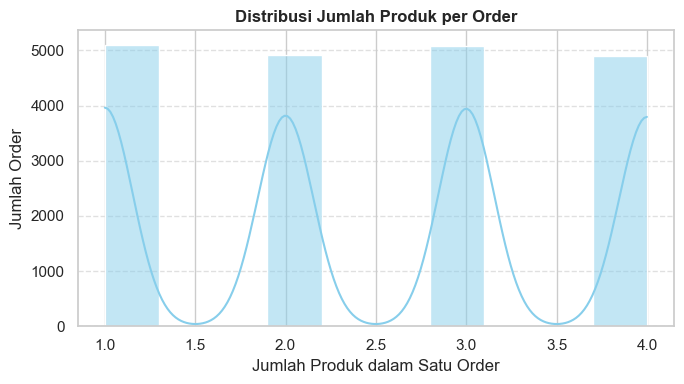

📁 Chart saved to outputs/charts/top10_kategori_dipesan.png


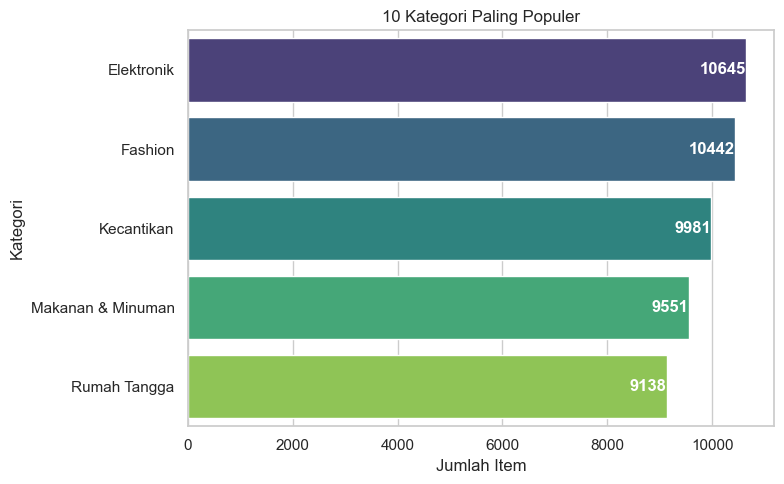

📁 Chart saved to outputs/charts/boxplot_kuantitas_produk.png


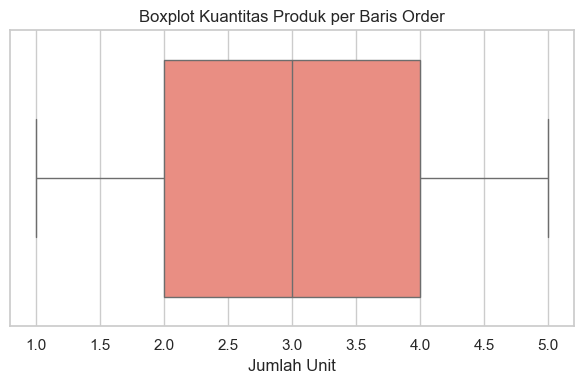

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils.plot_helper import save_plot

df_items = pd.read_csv("../data/raw/order_items.csv")
df_items.head()

# --- End of code cell 1

produk_per_order = df_items.groupby('order_id').size().reset_index(name='jumlah_produk')
plt.figure(figsize=(7, 4))
sns.histplot(produk_per_order['jumlah_produk'], bins=10, kde=True, color='skyblue', edgecolor='white')
plt.title("Distribusi Jumlah Produk per Order", fontsize=12, weight='bold')
plt.xlabel("Jumlah Produk dalam Satu Order")
plt.ylabel("Jumlah Order")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

save_plot(plt.gcf(), "produk_per_order_distribution.png")
plt.show()


# --- End of code cell 2

kategori_teratas = df_items['category'].value_counts().head(10)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=kategori_teratas.values, y=kategori_teratas.index, palette='viridis',hue=kategori_teratas.index)

for i, v in enumerate(kategori_teratas.values):
    ax.text(v - 5, i, str(v), color='white', va='center', ha='right', fontweight='bold')

plt.title("10 Kategori Paling Populer")
plt.xlabel("Jumlah Item")
plt.ylabel("Kategori")
plt.tight_layout()

save_plot(plt.gcf(), "top10_kategori_dipesan.png")
plt.show()

# --- End of code cell 3

plt.figure(figsize=(6, 4))
sns.boxplot(data=df_items, x='quantity', color='salmon')

plt.title("Boxplot Kuantitas Produk per Baris Order")
plt.xlabel("Jumlah Unit")
plt.tight_layout()

save_plot(plt.gcf(), "boxplot_kuantitas_produk.png")
plt.show()

# --- End of code cell 4



## 📝 Insight Order Items

- Mayoritas order berisi 1–2 produk.
- Kategori favorit: Elektronik & Fashion.
- Beberapa pesanan membeli 4–5 produk sekaligus (bulk buyer).

📎 Selesai! EDA semua tabel sudah selesai:
- ✅ `users`
- ✅ `products`
- ✅ `orders`
- ✅ `payments`
- ✅ `order_items` (sekarang)

Next:
- `gabung semua ke 1 file ipynb`
- `buat dashboard`
- `buat README GitHub`